In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import StandardScaler




In [31]:
amostra_df = pd.read_csv(f"Tabelas/amostra_series_df.csv")
amostra_df = amostra_df.set_index("Data da Coleta")
amostra_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes,Dia
Data da Coleta,,,,,,,,,,
2012-01-02,S,RS,TRAMANDAI,ETANOL,2.499,Litro,IPIRANGA,2012,1,2
2012-01-02,S,RS,NOVO HAMBURGO,DIESEL,2.049,Litro,PETROBRAS DISTRIBUIDORA S.A.,2012,1,2
2012-01-02,SE,SP,TUPA,GASOLINA,2.790,Litro,RAIZEN,2012,1,2
2012-01-02,SE,SP,ARARAQUARA,GASOLINA,2.529,Litro,BRANCA,2012,1,2
2012-01-02,NE,BA,CAMACARI,DIESEL,1.980,Litro,RAIZEN,2012,1,2


In [32]:
machine_learning_df = pd.DataFrame()
machine_learning_df[['Ano', 'Mes', 'Dia']] = amostra_df[['Ano', 'Mes', 'Dia']]

In [33]:
media_valor = amostra_df['Valor de Venda'].mean()
desvio_padrao_valor = amostra_df['Valor de Venda'].std()

def padronizar_valor(valor):
    return (valor - media_valor) / desvio_padrao_valor

machine_learning_df['Valor de Venda'] = amostra_df['Valor de Venda'].apply(padronizar_valor)

colunas_para_padronizar = amostra_df[['Regiao - Sigla', 'Estado - Sigla', 'Produto']]

dummy_columns = pd.get_dummies(colunas_para_padronizar)

machine_learning_df = pd.concat([machine_learning_df, dummy_columns], axis=1)

column_order = ['Valor de Venda'] + [col for col in machine_learning_df.columns if col != 'Valor de Venda']
machine_learning_df = machine_learning_df[column_order]

In [34]:
machine_learning_df.head()

,Valor de Venda,Ano,Mes,Dia,Regiao - Sigla_CO,Regiao - Sigla_N,Regiao - Sigla_NE,Regiao - Sigla_S,Regiao - Sigla_SE,Estado - Sigla_AC,...,Estado - Sigla_SE,Estado - Sigla_SP,Estado - Sigla_TO,Produto_DIESEL,Produto_DIESEL S10,Produto_DIESEL S50,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV
Data da Coleta,,,,,,,,,,,,,,,,,,,,,
2012-01-02,-0.730595,2012,1,2,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2012-01-02,-1.088245,2012,1,2,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2012-01-02,-0.499314,2012,1,2,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2012-01-02,-0.706751,2012,1,2,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2012-01-02,-1.143084,2012,1,2,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [35]:
X = machine_learning_df.drop('Valor de Venda', axis=1)
y = machine_learning_df['Valor de Venda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,Ano,Mes,Dia,Regiao - Sigla_CO,Regiao - Sigla_N,Regiao - Sigla_NE,Regiao - Sigla_S,Regiao - Sigla_SE,Estado - Sigla_AC,Estado - Sigla_AL,...,Estado - Sigla_SE,Estado - Sigla_SP,Estado - Sigla_TO,Produto_DIESEL,Produto_DIESEL S10,Produto_DIESEL S50,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV
Data da Coleta,,,,,,,,,,,,,,,,,,,,,
2018-01-09,2018,1,9,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
2022-07-25,2022,7,25,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2015-03-12,2015,3,12,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2014-11-18,2014,11,18,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2019-06-03,2019,6,3,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [36]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Saída única para previsão
])

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32, validation_data=(X_test_tensor, y_test_tensor))

Epoch 1/10
41883/41883 [==============================] - 599s 14ms/step - loss: 1.1342 - val_loss: 0.7018
Epoch 2/10
41883/41883 [==============================] - 491s 12ms/step - loss: 0.6945 - val_loss: 0.6982
Epoch 3/10
41883/41883 [==============================] - 470s 11ms/step - loss: 0.6926 - val_loss: 0.6959
Epoch 4/10
41883/41883 [==============================] - 425s 10ms/step - loss: 0.6918 - val_loss: 0.6982
Epoch 5/10
41883/41883 [==============================] - 419s 10ms/step - loss: 0.6913 - val_loss: 0.6945
Epoch 6/10
41883/41883 [==============================] - 467s 11ms/step - loss: 0.6909 - val_loss: 0.6945
Epoch 7/10
41883/41883 [==============================] - 460s 11ms/step - loss: 0.6905 - val_loss: 0.6971
Epoch 8/10
41883/41883 [==============================] - 465s 11ms/step - loss: 0.6900 - val_loss: 0.6952
Epoch 9/10
41883/41883 [==============================] - 468s 11ms/step - loss: 0.6895 - val_loss: 0.6927
Epoch 10/10
41883/41883 [============

In [46]:
model.evaluate(X_test_tensor, y_test_tensor)

10471/10471 [==============================] - 73s 7ms/step - loss: 0.6981


0.6981140375137329

In [52]:
prediction = model.predict(X_test_tensor)
valor_original = (prediction / desvio_padrao_valor) + media_valor
print("Predicted value:", valor_original)

10471/10471 [==============================] - 59s 6ms/step
Predicted value: [[3.2333531]
 [3.60818  ]
 [3.1771765]
 ...
 [3.5777814]
 [3.749051 ]
 [3.389673 ]]


In [53]:
dados_para_previsao = machine_learning_df.copy()

dados_para_previsao['Ano'] = machine_learning_df['Ano'] + 10

dados_para_previsao.head()

,Valor de Venda,Ano,Mes,Dia,Regiao - Sigla_CO,Regiao - Sigla_N,Regiao - Sigla_NE,Regiao - Sigla_S,Regiao - Sigla_SE,Estado - Sigla_AC,...,Estado - Sigla_SE,Estado - Sigla_SP,Estado - Sigla_TO,Produto_DIESEL,Produto_DIESEL S10,Produto_DIESEL S50,Produto_ETANOL,Produto_GASOLINA,Produto_GASOLINA ADITIVADA,Produto_GNV
Data da Coleta,,,,,,,,,,,,,,,,,,,,,
2012-01-02,-0.730595,2022,1,2,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2012-01-02,-1.088245,2022,1,2,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2012-01-02,-0.499314,2022,1,2,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2012-01-02,-0.706751,2022,1,2,False,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
2012-01-02,-1.143084,2022,1,2,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler


new_data_selected = machine_learning_df.drop('Valor de Venda', axis=1)  # Selecionando as colunas relevantes

input_features = new_data_selected.drop(columns=['Valor de Venda'])

scaler = StandardScaler()
input_features_scaled = scaler.fit_transform(input_features)

input_tensor = tf.convert_to_tensor(input_features_scaled, dtype=tf.float32)


In [58]:
new_data_selected = dados_para_previsao.drop('Valor de Venda', axis=1)  # Selecionando as colunas relevantes

# 2. Inicialização das previsões
valores_da_previsao = []

# 3. Fazer previsões para cada linha do DataFrame
for index, row in new_data_selected.iterrows():
    row_tensor = tf.convert_to_tensor(row, dtype=tf.float32)
    prediction = model.predict(row_tensor)  # Fazer previsão
    valores_da_previsao.append(prediction[0])  # Armazenar a previsão

# 4. Criação do Novo DataFrame
resultados = dados_para_previsao.copy()  # Crie uma cópia do new_data
resultados['Previsao'] = valores_da_previsao  # Adicione as previsões como uma nova coluna


In [13]:
resultados.columns

Index(['Valor de Venda', 'Ano', 'Mes', 'Dia', 'Regiao - Sigla_CO',
       'Regiao - Sigla_N', 'Regiao - Sigla_NE', 'Regiao - Sigla_S',
       'Regiao - Sigla_SE', 'Estado - Sigla_AC', 'Estado - Sigla_AL',
       'Estado - Sigla_AM', 'Estado - Sigla_AP', 'Estado - Sigla_BA',
       'Estado - Sigla_CE', 'Estado - Sigla_DF', 'Estado - Sigla_ES',
       'Estado - Sigla_GO', 'Estado - Sigla_MA', 'Estado - Sigla_MG',
       'Estado - Sigla_MS', 'Estado - Sigla_MT', 'Estado - Sigla_PA',
       'Estado - Sigla_PB', 'Estado - Sigla_PE', 'Estado - Sigla_PI',
       'Estado - Sigla_PR', 'Estado - Sigla_RJ', 'Estado - Sigla_RN',
       'Estado - Sigla_RO', 'Estado - Sigla_RR', 'Estado - Sigla_RS',
       'Estado - Sigla_SC', 'Estado - Sigla_SE', 'Estado - Sigla_SP',
       'Estado - Sigla_TO', 'Produto_DIESEL', 'Produto_DIESEL S10',
       'Produto_DIESEL S50', 'Produto_ETANOL', 'Produto_GASOLINA',
       'Produto_GASOLINA ADITIVADA', 'Produto_GNV', 'Previsao'],
      dtype='object')

In [14]:
resultados = resultados.drop(['Regiao - Sigla_CO',
       'Regiao - Sigla_N', 'Regiao - Sigla_NE', 'Regiao - Sigla_S',
       'Regiao - Sigla_SE', 'Estado - Sigla_AC', 'Estado - Sigla_AL',
       'Estado - Sigla_AM', 'Estado - Sigla_AP', 'Estado - Sigla_BA',
       'Estado - Sigla_CE', 'Estado - Sigla_DF', 'Estado - Sigla_ES',
       'Estado - Sigla_GO', 'Estado - Sigla_MA', 'Estado - Sigla_MG',
       'Estado - Sigla_MS', 'Estado - Sigla_MT', 'Estado - Sigla_PA',
       'Estado - Sigla_PB', 'Estado - Sigla_PE', 'Estado - Sigla_PI',
       'Estado - Sigla_PR', 'Estado - Sigla_RJ', 'Estado - Sigla_RN',
       'Estado - Sigla_RO', 'Estado - Sigla_RR', 'Estado - Sigla_RS',
       'Estado - Sigla_SC', 'Estado - Sigla_SE', 'Estado - Sigla_SP',
       'Estado - Sigla_TO', 'Produto_DIESEL', 'Produto_DIESEL S10',
       'Produto_DIESEL S50', 'Produto_ETANOL', 'Produto_GASOLINA',
       'Produto_GASOLINA ADITIVADA', 'Produto_GNV'], axis=1)

In [15]:
colunas_para_adicionar = amostra_df[['Regiao - Sigla', 'Estado - Sigla', 'Produto']]

resultados = pd.concat([resultados, colunas_para_adicionar], axis=1)

In [16]:
resultados

,Valor de Venda,Ano,Mes,Dia,Previsao,Regiao - Sigla,Estado - Sigla,Produto
Data da Coleta,,,,,,,,
2012-01-02,-0.730595,2022,1,2,0.988464,S,RS,ETANOL
2012-01-02,-1.088245,2022,1,2,1.220352,S,RS,DIESEL
2012-01-02,-0.499314,2022,1,2,1.464718,SE,SP,GASOLINA
2012-01-02,-0.706751,2022,1,2,1.464718,SE,SP,GASOLINA
2012-01-02,-1.143084,2022,1,2,1.157166,NE,BA,DIESEL
...,...,...,...,...,...,...,...,...
2022-12-30,1.368414,2032,12,30,4.800728,S,SC,GASOLINA ADITIVADA
2022-12-30,1.249197,2032,12,30,4.892387,S,RS,GASOLINA ADITIVADA
2022-12-30,1.201510,2032,12,30,4.614220,SE,SP,GASOLINA ADITIVADA


In [17]:
colunas_despadronizar = ['Valor de Venda', 'Previsao']

for coluna in colunas_despadronizar:
    resultados[coluna] = (resultados[coluna] * desvio_padrao_valor) + media_valor

resultados

,Valor de Venda,Ano,Mes,Dia,Previsao,Regiao - Sigla,Estado - Sigla,Produto
Data da Coleta,,,,,,,,
2012-01-02,2.499,2022,1,2,4.661943,S,RS,ETANOL
2012-01-02,2.049,2022,1,2,4.953707,S,RS,DIESEL
2012-01-02,2.790,2022,1,2,5.261171,SE,SP,GASOLINA
2012-01-02,2.529,2022,1,2,5.261171,SE,SP,GASOLINA
2012-01-02,1.980,2022,1,2,4.874205,NE,BA,DIESEL
...,...,...,...,...,...,...,...,...
2022-12-30,5.140,2032,12,30,9.458584,S,SC,GASOLINA ADITIVADA
2022-12-30,4.990,2032,12,30,9.573911,S,RS,GASOLINA ADITIVADA
2022-12-30,4.930,2032,12,30,9.223917,SE,SP,GASOLINA ADITIVADA


In [ ]:
resultados.to_csv('Tabelas/resultados_previsaoML.csv', index=False)

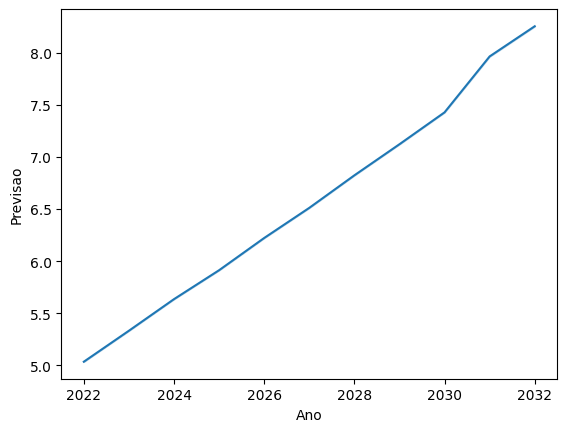

In [19]:
grafico = sns.lineplot(x='Ano', y='Previsao', data=resultados)